# **KMeans using Housing Dataset**

In [4]:
import pandas as pd

X =pd.read_csv("housing.csv")
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


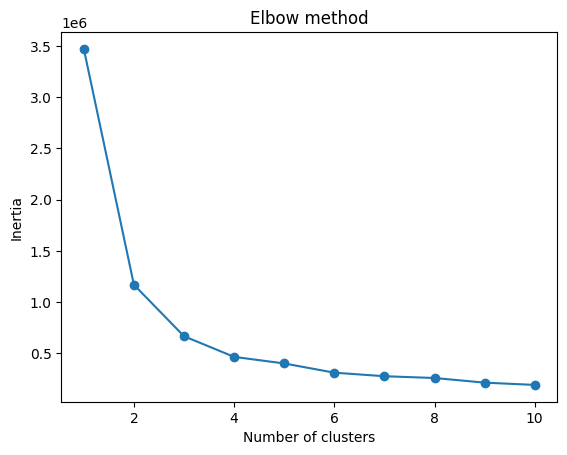

In [5]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

data = list(zip(X.MedInc, X.HouseAge, X.AveRooms))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:

from sklearn.decomposition import PCA

X_norm = (X - X.min())/(X.max() - X.min())

pca = PCA(n_components=2) #2-dimensional PCA

transformed = pd.DataFrame(pca.fit_transform(X_norm))

>**What is a PCA Model?**

  PCA (Principal Component Analysis) is a technique used to reduce the number of features in a dataset while keeping the most important information.

>**How Does It Work?**

* Identifies Important Patterns – Finds the directions (principal components) where the data varies the most.
* Removes Less Useful Details – Keeps only the most important patterns and ignores minor variations.
* Reduces Complexity – Converts many features into a few important ones, making data easier to analyze and visualize.

> **Uses of PCA**

* Data Visualization – Converts high-dimensional data into 2D or 3D for easy plotting.
* Faster Machine Learning – Reduces the number of features, making models train faster.
* Noise Reduction – Removes unnecessary details, improving accuracy in some cases.

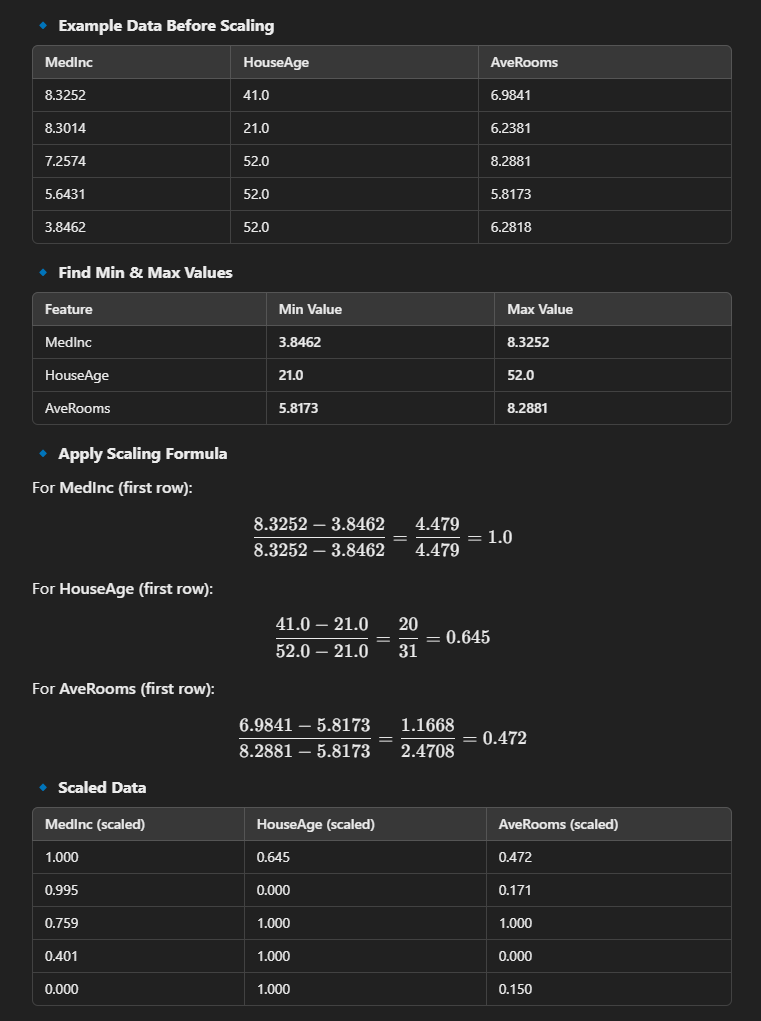

> **pca.fit_transform(X_norm)**

fit → Finds important patterns (principal components).<br>
transform → Converts data into fewer dimensions.
Returns a reduced dataset.<br><br>
> **pd.DataFrame(...)**

Converts the reduced data into a DataFrame for easy use.

In [9]:
print(transformed)

              0         1
0      0.267184  0.648987
1      0.252400  0.282721
2      0.328713  0.585428
3      0.341324  0.536940
4      0.350373  0.503616
...         ...       ...
20635  0.447789 -0.270524
20636  0.436279 -0.325650
20637  0.429064 -0.328828
20638  0.439350 -0.325415
20639  0.420657 -0.330720

[20640 rows x 2 columns]


Visualize the transformed data

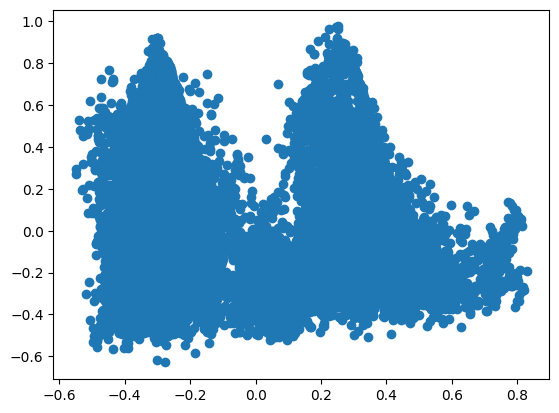

In [11]:
import matplotlib.pyplot as plt

x = transformed[0]
y = transformed[1]

plt.scatter(x, y)
plt.show()

[3272.1502187806072, 1688.5238783645718, 1098.4871066728317, 763.5787790844324, 600.8577090286527, 552.0476119044456, 397.11619892439154, 358.85124658431556, 327.04614249515146, 289.29272782703066]


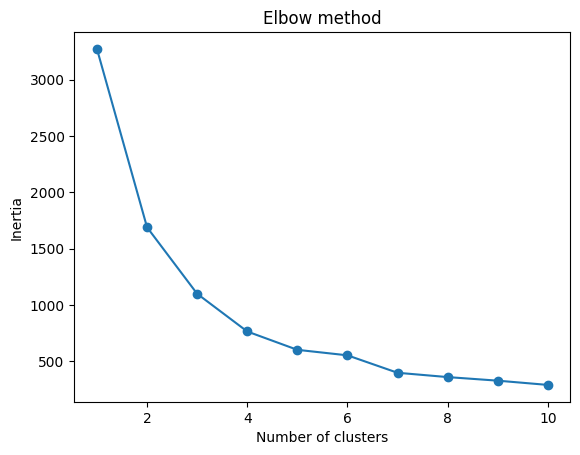

In [31]:

from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

print(inertias)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data)

c=kmeans.labels_
print(c)

[1 1 1 ... 1 1 1]


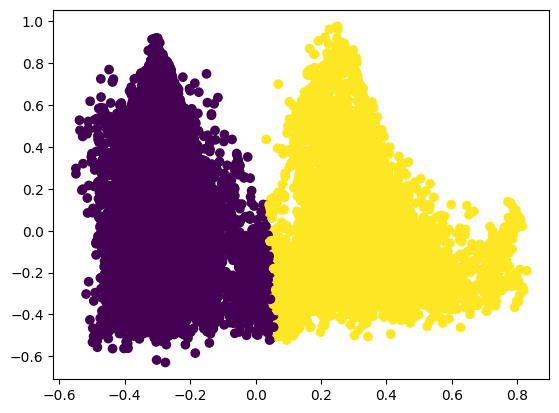

In [37]:

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

# **Clusture Evaluation**

In [38]:
from sklearn import metrics

metrics.silhouette_score(data, c, metric='euclidean')

0.48866223412937987

Finding silhouette_score for each number of clusters

In [44]:
from sklearn import metrics
s=[]
for i in range (2,11):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(data)
  c=kmeans.labels_
  s.append(metrics.silhouette_score(data, c, metric='euclidean'))

for i in range(2,11):
  print("Cluster No: ",i,"  Silhouette score: ",s[i-2])

Cluster No:  2   Silhouette score:  0.4886676720343599
Cluster No:  3   Silhouette score:  0.4922627098510133
Cluster No:  4   Silhouette score:  0.46088414326219646
Cluster No:  5   Silhouette score:  0.4346266549401685
Cluster No:  6   Silhouette score:  0.409341384673533
Cluster No:  7   Silhouette score:  0.4230534192589071
Cluster No:  8   Silhouette score:  0.4116170203336406
Cluster No:  9   Silhouette score:  0.38950757114294926
Cluster No:  10   Silhouette score:  0.38166914035948357


Finding Calinski-Harabasz Index for each number of clusters

In [43]:
from sklearn import metrics
s=[]
for i in range (2,11):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(data)
  c=kmeans.labels_
  s.append(metrics.calinski_harabasz_score(data, c))

for i in range(2,11):
  print("Cluster No: ",i,"  Calinski-Harabasz Index: ",s[i-2])

Cluster No:  2   Calinski-Harabasz Index:  19356.143386597356
Cluster No:  3   Calinski-Harabasz Index:  20418.22721135548
Cluster No:  4   Calinski-Harabasz Index:  22598.368710097107
Cluster No:  5   Calinski-Harabasz Index:  22934.35929513044
Cluster No:  6   Calinski-Harabasz Index:  23786.55108177936
Cluster No:  7   Calinski-Harabasz Index:  24896.79860542583
Cluster No:  8   Calinski-Harabasz Index:  24945.501812408173
Cluster No:  9   Calinski-Harabasz Index:  24873.551720781816
Cluster No:  10   Calinski-Harabasz Index:  24071.911161028645


Finding Davies-Bouldin Index for each number of clusters

In [42]:
from sklearn import metrics
s=[]
for i in range (2,11):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(data)
  c=kmeans.labels_
  s.append(metrics.davies_bouldin_score(data, c))

for i in range(2,11):
  print("Cluster No: ",i,"  Davies-Bouldin Index: ",s[i-2])

Cluster No:  2   Davies-Bouldin Index:  0.8602926582381891
Cluster No:  3   Davies-Bouldin Index:  0.8170323223137353
Cluster No:  4   Davies-Bouldin Index:  0.7383882204304933
Cluster No:  5   Davies-Bouldin Index:  0.7677573536685349
Cluster No:  6   Davies-Bouldin Index:  0.8175653631307154
Cluster No:  7   Davies-Bouldin Index:  0.7706329663161803
Cluster No:  8   Davies-Bouldin Index:  0.8533362724413491
Cluster No:  9   Davies-Bouldin Index:  0.8253349436040041
Cluster No:  10   Davies-Bouldin Index:  0.8143042029833569
